In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, importlib
sys.path.append('/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_shared_packages')
import process_cl2_logfile as process_cl2#This underline us unavoidable
pass
from IPython.display import display

use_nominal_cl2 = True

In [4]:
# Import stuff
bypass_data_929 = pd.read_csv("/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_exported_data/bypasses_09-29_cl2_campaign_after_mfc_zero.csv")
conversion_data_929 = pd.read_csv("/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_exported_data/conversions_09-29_cl2_campaign_after_mfc_zero.csv")
bypass_data_924 = pd.read_csv("/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_exported_data/bypasses_09-24_cl2_sweeps_no_cofeed.csv")
conversion_data_924 = pd.read_csv("/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_exported_data/conversions_09-24_cl2_sweeps_no_cofeed.csv")
bypass_data_1023 = pd.read_csv("/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_exported_data/bypasses_10-23_cl2_misc_follow_ups.csv")
conversion_data_1023 = pd.read_csv("/Users/work/Desktop/Research/Experimental Data/Fall-2024-Cl2/_exported_data/conversions_10-23_cl2_misc_follow_ups.csv")
all_bypass_data = pd.concat([bypass_data_924,bypass_data_929,bypass_data_1023],axis=0,ignore_index=True).reindex()
all_conversion_data = pd.concat([conversion_data_924,conversion_data_929,conversion_data_1023],axis=0,ignore_index=True).reindex()

<h1> First Attempt at Cl* Count </h1>

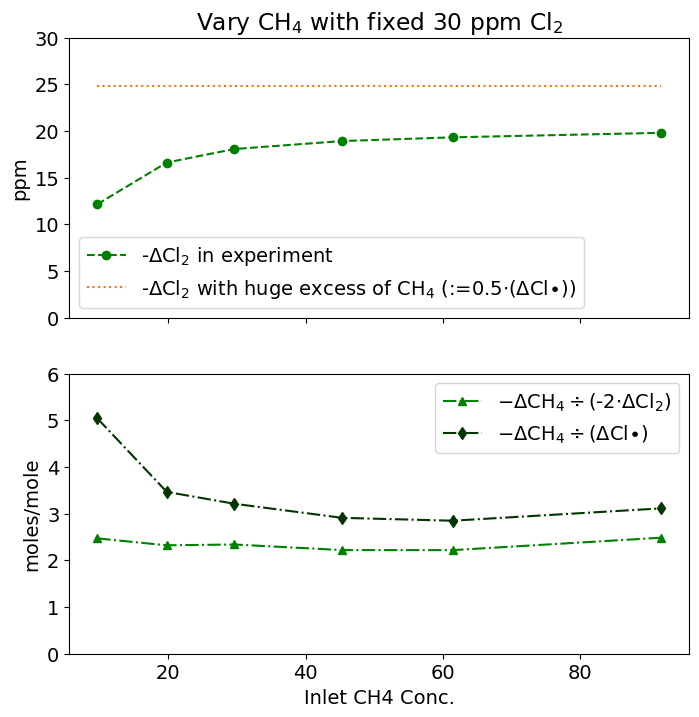

In [65]:
# Whittle it down to the experiments we want
titration_data = all_conversion_data[all_conversion_data["experiment_name"]=='10-10-24 Cl* Count w/ Excess CH4']
prev_exp_data = all_conversion_data[all_conversion_data["experiment_name"]=='09-30-24 Sweep CH4 (10-90 ppm)']

ch4_baselines_exp = prev_exp_data['Selected: CH4 (ppm) baseline']
ch4_conversions_exp = prev_exp_data['Selected: CH4 (ppm) conversion']
exp_start_times = prev_exp_data['start_time']
titration_start_times = titration_data['start_time']

# Calculate the chlorine levels via the recorded conversions
cl2_conversions_exp = [conv*(30.0/baseline) for conv,baseline in zip(prev_exp_data['Cl2 LabJack: Cl2 Node A (ppm) conversion'],prev_exp_data['Cl2 LabJack: Cl2 Node A (ppm) baseline'])]
cl2_conversions_titration = [conv*(30.0/baseline) for conv,baseline in zip(titration_data['Cl2 LabJack: Cl2 Node A (ppm) conversion'],titration_data['Cl2 LabJack: Cl2 Node A (ppm) baseline'])]

# Setup subplots
plt.rcParams.update({'font.size': 14})
(fig,(ax1,ax2)) = plt.subplots(nrows=2,figsize=(8,8),sharex=True)

# Make the first plot
ax1.plot(ch4_baselines_exp,cl2_conversions_exp,label="-$\Delta$Cl$_2$ in experiment",color='g',marker='o',linestyle='--')
ax1.plot(ch4_baselines_exp,np.ones(len(ch4_baselines_exp))*np.average(cl2_conversions_titration),
         label="-$\Delta$Cl$_2$ with huge excess of CH$_4$ (:=0.5$\cdot$($\Delta$Cl$\\bullet$))",color='xkcd:orange',linestyle=':')
ax1.set_ylabel('ppm')
ax1.set_ylim(0,30)
ax1.legend()

# Make the second plot
ch4_per_cl2 = [2*b/a for a,b in zip(ch4_conversions_exp,cl2_conversions_exp)]
ax2.plot(ch4_baselines_exp,ch4_per_cl2,label="$-\Delta$CH$_4\div$(-2$\cdot\Delta$Cl$_2$)",color='g',linestyle='-.',marker='^')
cl_star_budget = 2*np.average(cl2_conversions_titration)
ch4_per_cl_star = [cl_star_budget/a for a in ch4_conversions_exp]
ax2.plot(ch4_baselines_exp,ch4_per_cl_star,label="$-\Delta$CH$_4\div$($\Delta$Cl$\\bullet$)",color='xkcd:dark green',linestyle='-.',marker='d')
ax2.set_ylabel("moles/mole")
ax2.set_xlabel('Inlet CH4 Conc.')
ax2.set_ylim(0,6)
ax2.legend()

ax1.set_title("Vary CH$_4$ with fixed 30 ppm Cl$_2$")
plt.show()